**In this example I'm going to create a linear regression model, to see how does the number of study hours affect students' performance.**

In [2]:
# import the proper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split

In [3]:
# read the csv file
df = pd.read_csv("Student_Performance.csv")

# remove any null values
df.dropna()

df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# remove the other columns - focus only on Hours Studied
df = df.drop(["Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"], axis=1)

In [6]:
# check the dataframe
df.head(5)

,Hours Studied,Performance Index
0,7,91.0
1,4,65.0
2,8,45.0
3,5,36.0
4,7,66.0


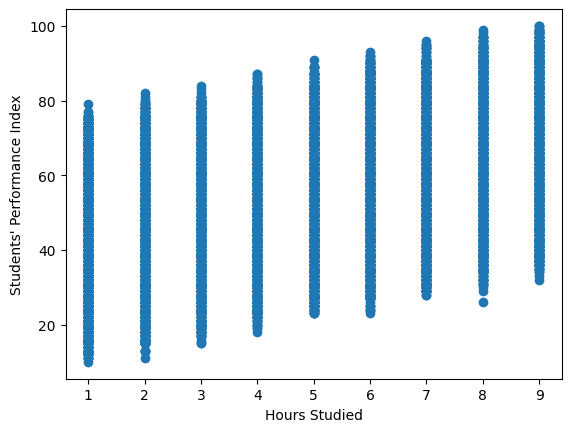

In [12]:
# scatter plot creation

plt.scatter(df["Hours Studied"], df["Performance Index"])
plt.xlabel("Hours Studied")
plt.ylabel("Students' Performance Index")

plt.show()

**Linear Regression Model Creation**

In [7]:
# split data to training and testing ones
X = df["Hours Studied"]
y = df["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# check the spli's correctness
print(X_train.shape)

(8000,)


In [9]:
print(X_test.shape)

(2000,)


In [10]:
print(y_train.shape)

(8000,)


In [11]:
print(y_test.shape)

(2000,)


In [17]:
# linear model
lm = linear_model.LinearRegression()

In [20]:
# train the linear model based on the training sets
lm.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [21]:
# check the model's features
slope = lm.coef_
intercept = lm.intercept_

print("The slope is: ", slope, " and the intercept is: ", intercept)

The slope is:  [2.78430044]  and the intercept is:  41.436634826535744


**This means that with 0 study hours the average performance of a student will be 41.43/100 and for every hour a student studies, the performance index increases by ~2.8**

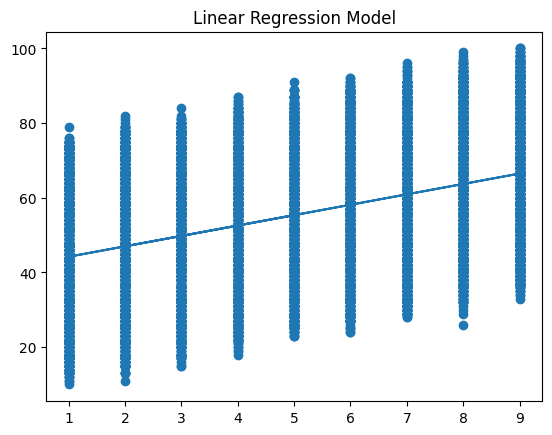

In [22]:
# check the model's line
plt.scatter(X_train, y_train)

def myfunc(x):
  return slope*x+intercept

mymodel = list(map(myfunc, X_train))

plt.plot(X_train, mymodel)
plt.title("Linear Regression Model")

plt.show()

In [36]:
# comparison between predicted values and the true values
y_pred = lm.predict(X_test.values.reshape(-1,1))

for i in range(len(y_pred)):
  print("Predicted Values: ", y_pred[i], " True Values: ", y_test.iloc[i])

Predicted Values:  55.358137032389614  True Values:  51.0
Predicted Values:  47.005235708877294  True Values:  20.0
Predicted Values:  60.92673791473116  True Values:  46.0
Predicted Values:  58.14243747356039  True Values:  28.0
Predicted Values:  60.92673791473116  True Values:  41.0
Predicted Values:  66.49533879707272  True Values:  59.0
Predicted Values:  58.14243747356039  True Values:  48.0
Predicted Values:  58.14243747356039  True Values:  87.0
Predicted Values:  60.92673791473116  True Values:  37.0
Predicted Values:  60.92673791473116  True Values:  73.0
Predicted Values:  52.57383659121884  True Values:  66.0
Predicted Values:  47.005235708877294  True Values:  30.0
Predicted Values:  66.49533879707272  True Values:  61.0
Predicted Values:  58.14243747356039  True Values:  45.0
Predicted Values:  63.711038355901934  True Values:  52.0
Predicted Values:  44.220935267706516  True Values:  41.0
Predicted Values:  44.220935267706516  True Values:  63.0
Predicted Values:  63.711

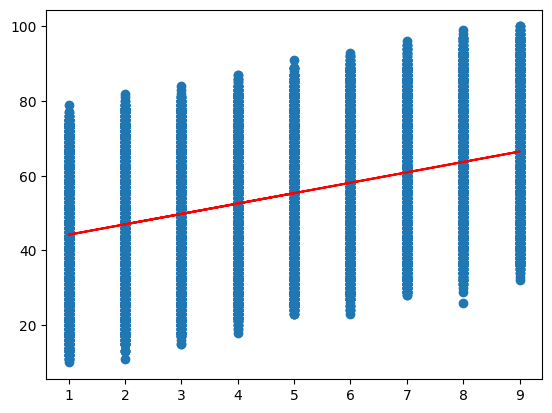

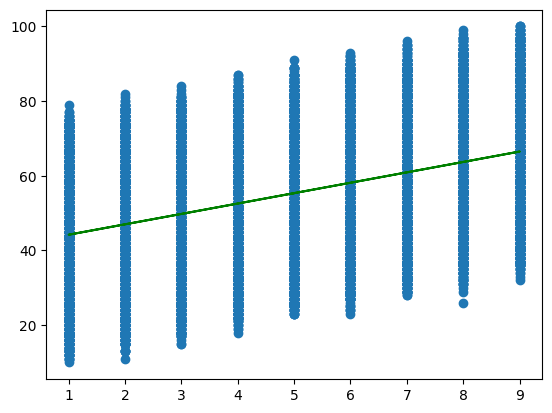

In [30]:
plt.scatter(X, y)

mymodel = list(map(myfunc, X_train))
plt.plot(X_train, mymodel, color="red")

plt.show()

plt.scatter(X, y)

mymodel2 = list(map(myfunc, X_test))
plt.plot(X_test, mymodel2, color="green")

plt.show()